<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>

# 11 First_order methods for Optimization

Optimization is always a quite frequent case which we will meet everyday. 
It is always interesting and rather important to find the best option for any given model. 
It is in statistics, quantitative finance, risk, operations research, materials design, and other predictive sciences. 

## 11.1 1D example
Let's get started with a simplest example, to find the minima/maxima of a polynomial curve.

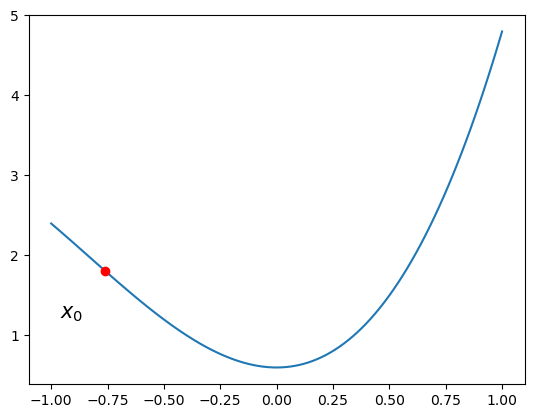

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A,B,C = 1.2, 3.0, 0.6                         # coefficients of objective functions
x_min, x_max = -1, 1                          # range of x
x0 = x_min + np.random.random()*(x_max-x_min) # randomly pick a point in the given range

f = lambda x: A*x*x*x + B*x*x + C

x = np.linspace(x_min, x_max, 101)
plt.plot(x,  f(x))
plt.plot(x0, f(x0), 'ro')
plt.text(x0-0.2, f(x0)-0.6, '$x_0$', fontsize=15)

plt.show()


## 11.2 Gradient Descent

Suppose we randomly pick a point $x_0$, How can we get the minimum value in this curve?
A wise way is to follow the derivatives. Let's always go downhill! 
Therefore, we will need some information about the derivatives of each step, and then move it a bit for each step.
$$x_{n+1} = x_n - \gamma f'(x_n)$$

in which $f'$ is the slope and $\gamma$ is the step length.

If $\gamma$ is very small and $f'$ can be acurately calculated. We should be able to get the minimum value soon.

In [2]:
def derivative(f, x, dx=0.1):
    return (f(x + dx) - f(x)) / dx

def minimize(f, x0, dx=0.01, N=1000):
    x_now = x0
    converged = False
    x_hist = [x0]
    
    for i in range(N):
        x_next = x_now - derivative(f, x_now) * dx
        if f(x_next) < f(x_now):
            x_now = x_next
            x_hist.append(x_now)
        else:
            converged = True
            break
    return converged, x_now, f(x_now), np.array(x_hist)


x0:  -2    converged:  True    Best solution: x= -4.896169400855355e+20 f= -1.4084795710524376e+62


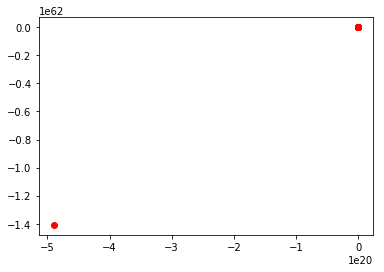

In [45]:
x0 = -2
converged, x_best, f_min, x_hist = minimize(f, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min)

plt.plot(x,  f(x))
plt.plot(x_hist, f(x_hist), 'ro')
plt.show()


In [8]:
# let's try to pick different random numbers and repeat it for a couple of times

for i in range(10):
    x1 = x_min + np.random.random() * (x_max - x_min)
    converged, x_best, f_min, x_hist = minimize(f, x1)
    print(f"x1: {x1:8.4f} converged: {converged}, Solution: x={x_best:8.4f} f={f_min:8.4f}")


x1:   0.0326 converged: True, Solution: x= -0.0008 f=  0.6000
x1:  -0.7994 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.2046 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.5329 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.4304 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.6726 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.8022 converged: True, Solution: x= -0.0505 f=  0.6075
x1:  -0.4630 converged: True, Solution: x= -0.0505 f=  0.6075
x1:   0.4258 converged: True, Solution: x=  0.0016 f=  0.6000
x1:  -0.1833 converged: True, Solution: x= -0.0505 f=  0.6075


## 11.3 Variable step size


From the above data, it is quite clear that the algorithm is not very efficient and highly sensitive to the choice of
step size $\gamma$. With certain assumptions on the function $F$ and particular choices of $\gamma$  (e.g., chosen either via a line search that satisfies the Wolfe conditions or the Barzilai-Borwein method shown as following):

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

For the 1d case, the equation returns to:

$$ \gamma_n = \frac{(x_n-x_{n-1})} {\nabla f(x_n) - \nabla f(x_{n-1}) }  $$

$$x_{n+1} = x_n - \gamma \nabla f(x_n)$$



In [9]:
# variable stepwidth
def minimize2(f, x0, N=1000):
    x_now = x0
    x_prev = None
    converged = False

    for i in range(N):
        if x_prev is None:
            dx = 0.01
        else:
            dfx = derivative(f, x_now) - derivative(f, x_prev)
            dx = (x_now - x_prev) / dfx
        x_next = x_now - derivative(f, x_now) * dx

        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next
        else:
            converged = True
            break
    return converged, x_now, f(x_now), i

converged, x_best, f_min, i = minimize2(f, x0)
print('x0:', x0, 'converged:', converged, 'Best solution: x=', x_best, 'f=', f_min, 'cycles:', i)


x0: -0.7609952105316022 converged: True Best solution: x= -0.7365640087180657 f= 1.748052989988416 cycles: 1


In [51]:
# Try many times again
for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    converged, x_best, f_min, ncycle = minimize2(f, x1)
    print('x0={0:8.4f}; converged={1}; x={2:4f}; f={3:6.4f}; cycles={4:d}'.format(x1, converged, x_best, f_min, ncycle))

x0=  0.6650; converged=True; x=-0.009730; f=0.6003; cycles=3
x0=  0.1605; converged=True; x=-0.030475; f=0.6028; cycles=2
x0=  0.2618; converged=True; x=-0.010564; f=0.6003; cycles=2
x0= -0.5179; converged=True; x=-0.049841; f=0.6073; cycles=5
x0=  0.2251; converged=True; x=-0.018343; f=0.6010; cycles=2
x0=  0.5310; converged=True; x=-0.024669; f=0.6018; cycles=3
x0=  0.4973; converged=True; x=-0.027943; f=0.6023; cycles=3
x0= -0.0622; converged=True; x=-0.050421; f=0.6075; cycles=2
x0=  0.7458; converged=True; x=0.000643; f=0.6000; cycles=3
x0= -0.1330; converged=True; x=-0.046233; f=0.6063; cycles=2


### Question
Use the pandas library to format the above output

## 11.4 2D example
The above formula could also be extended to 2D, such as the function below,

$$ f(x, y) = x^2/2 + y^2/4$$

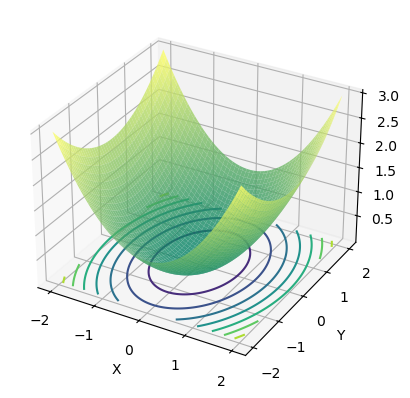

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -2, 2                        # range of x
y_min, y_max = -2, 2                          # range of x

def f2(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min, x_max, 100)
ny = np.linspace(y_min, y_max, 100)
x,y = np.meshgrid(nx, ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='summer', alpha=0.8)
cset = ax.contour(x, y, z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')
plt.show()


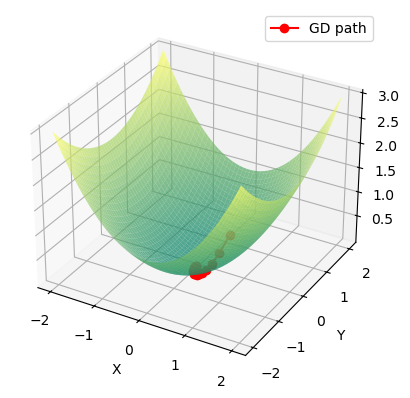

In [15]:
# The previous cell is empty. Let's provide a 2D gradient descent example for the function f2(x, y) = x^2/2 + y^2/4.
# We'll implement gradient descent and visualize the optimization path.

def grad_f2(x, y):
    return np.array([x, 0.5*y])

def gradient_descent_2d(f, grad_f, x0, y0, lr=0.1, n_iter=30):
    path = [(x0, y0)]
    x, y = x0, y0
    for _ in range(n_iter):
        grad = grad_f(x, y)
        x = x - lr * grad[0]
        y = y - lr * grad[1]
        path.append((x, y))
    return np.array(path)

# Initial point
x0, y0 = 1.5, -1.5
path = gradient_descent_2d(f2, grad_f2, x0, y0, lr=0.2, n_iter=20)

# Plot the surface and the optimization path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='summer', alpha=0.7)
ax.plot(path[:,0], path[:,1], f2(path[:,0], path[:,1]), 'ro-', label='GD path')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')
ax.legend()
plt.show()

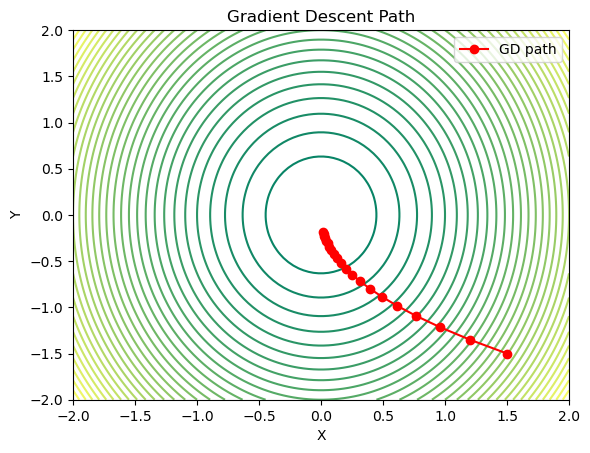

In [18]:
# plot the contour and the optimization path
plt.figure()
plt.contour(x, y, z, levels=30, cmap='summer')
plt.plot(path[:,0], path[:,1], 'ro-', label='GD path')
plt.xlabel('X') 
plt.ylabel('Y')
plt.title('Gradient Descent Path')
plt.legend()
plt.show()